# German Credit Risk

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/german_credit_data.csv')
df_copy = pd.read_csv('/content/german_credit_data.csv')

## Performing EDA

In [ ]:
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.shape

(1000, 10)

There are 1000 instances and 10 attributes in german credit dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
#Checking for duplicates

df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

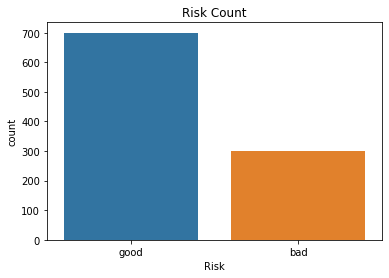

In [ ]:
# countplot to count categorical variable Risk

sns.countplot(x=df["Risk"]).set_title('Risk Count');

## Data Cleaning

There are missing values in 'Saving accounts' and 'Checking account' column in the german credit dataset.
We will do mode imputer since this is a dicrete data.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
# mode imputer

mode_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df['Saving accounts'] = mode_imputer.fit_transform(df[['Saving accounts']])

In [ ]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
# mode imputer
mode_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df['Checking account'] = mode_imputer.fit_transform(df[['Checking account']])

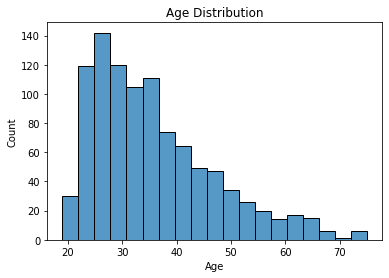

In [ ]:
# lets plot histogram, boxplot and Q-Q plot to understand about age column

sns.histplot(df.Age).set_title('Age Distribution');

From histogram we can see the data to be slightly skewed towards right.

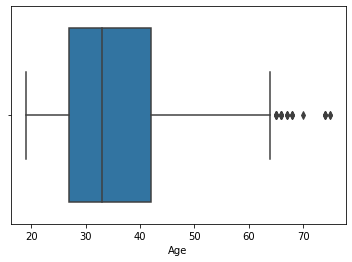

In [ ]:
# boxplot

sns.boxplot(x=df.Age);

There are also outliers in this column.

## Applying the log transformation:

In [ ]:
df['Age'] = np.log(df['Age'])

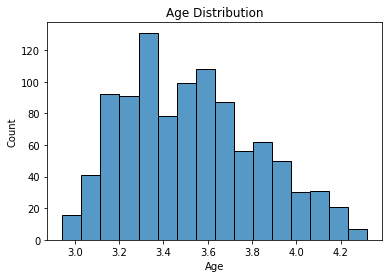

In [ ]:
sns.histplot(df.Age).set_title('Age Distribution');

After applying the log transformation data has been normalized.

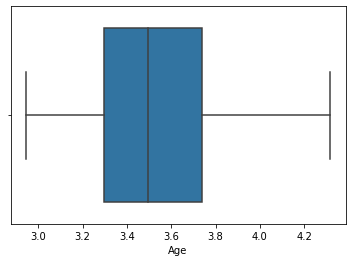

In [ ]:
# boxplot

sns.boxplot(x=df.Age);

Log transformation of this column also took care of the outliers.

In [ ]:
#We will analyse sex column now.

df.Sex.value_counts()

male      690
female    310
Name: Sex, dtype: int64

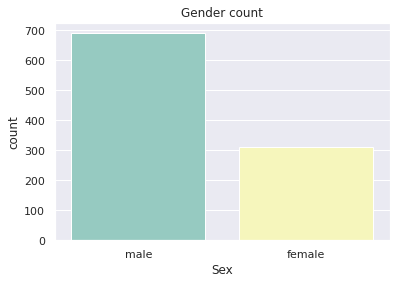

In [ ]:
#plotting bar graph

sns.set_theme(style="darkgrid")
ax = sns.countplot(x=df.Sex, palette="Set3")
ax.set_title('Gender count');

In [ ]:
#We will analyse job column now.

df.Job.value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

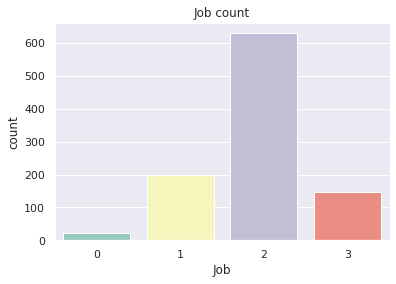

In [ ]:
#plotting bar graph

sns.set_theme(style="darkgrid")
ax = sns.countplot(x=df.Job, palette="Set3")
ax.set_title('Job count');

In [ ]:
# We will analyse Housing column now.

df.Housing.value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

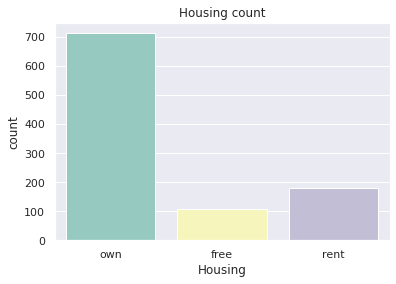

In [ ]:
# plotting bar graph

sns.set_theme(style="darkgrid")
ax = sns.countplot(x=df.Housing, palette="Set3")
ax.set_title('Housing count');

In [ ]:
# We will analyse Saving accounts column now.

df['Saving accounts'].value_counts()

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

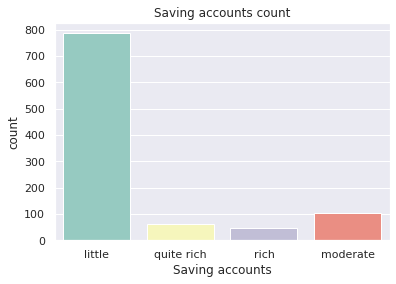

In [ ]:
# plotting bar graph

sns.set_theme(style="darkgrid")
ax = sns.countplot(x=df['Saving accounts'], palette="Set3")
ax.set_title('Saving accounts count');

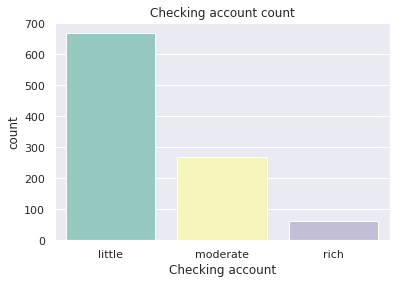

In [ ]:
# plotting bar graph

sns.set_theme(style="darkgrid")
ax = sns.countplot(x=df['Checking account'], palette="Set3")
ax.set_title('Checking account count');

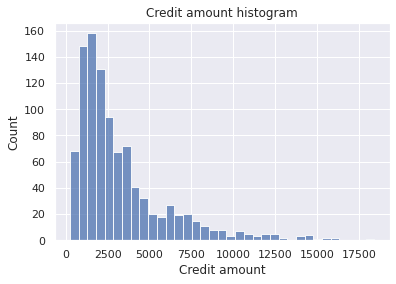

In [ ]:
# lets plot histogram, boxplot and Q-Q plot to understand more about this column

sns.histplot(df['Credit amount']).set_title('Credit amount histogram');

From histogram we can see the data to be slightly skewed towards right.

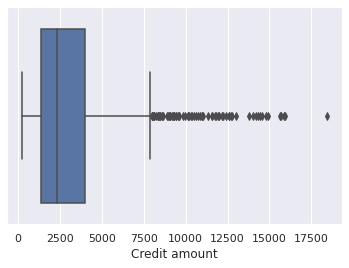

In [ ]:
# boxplot

sns.boxplot(x=df['Credit amount']);

There are also outliers in this column.

## Applying the log transformation:

In [ ]:
df['Credit amount'] = np.log(df['Credit amount'])

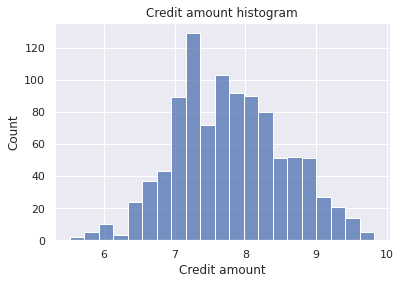

In [ ]:
sns.histplot(df['Credit amount']).set_title('Credit amount histogram');

After applying the log transformation data has been normalized.

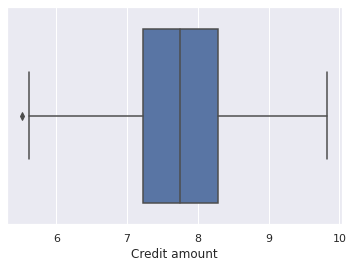

In [ ]:
# boxplot

sns.boxplot(x=df['Credit amount']);

Log transformation of this column also took care of the outliers.

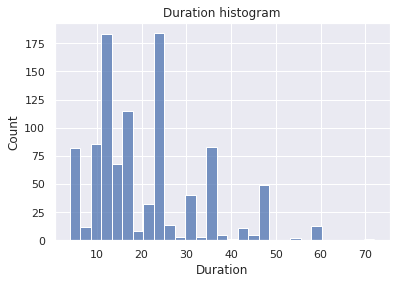

In [ ]:
# lets plot histogram, boxplot and Q-Q plot to understand more about this column

sns.histplot(df.Duration).set_title('Duration histogram');

From histogram we can see the data to be slightly skewed towards right.

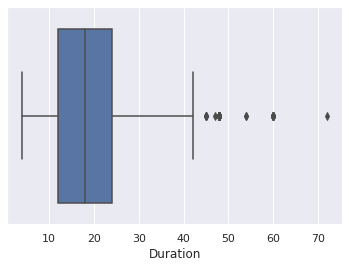

In [ ]:
# boxplot

sns.boxplot(x=df.Duration);

There are also outliers in this column.

## Applying the log transformation:

In [ ]:
df['Duration'] = np.log(df['Duration'])

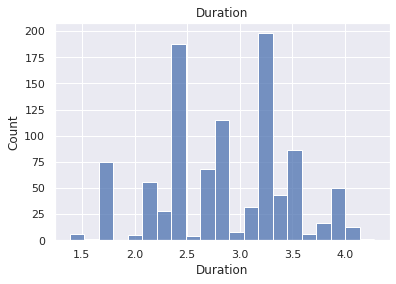

In [ ]:
sns.histplot(df['Duration']).set_title('Duration');

After applying the log transformation data has been normalized.

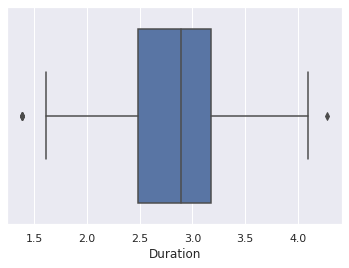

In [ ]:
# boxplot

sns.boxplot(x=df.Duration);

Log transformation of this column also took care of the outliers.

In [ ]:
# We will analyse Purpose column now.

df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

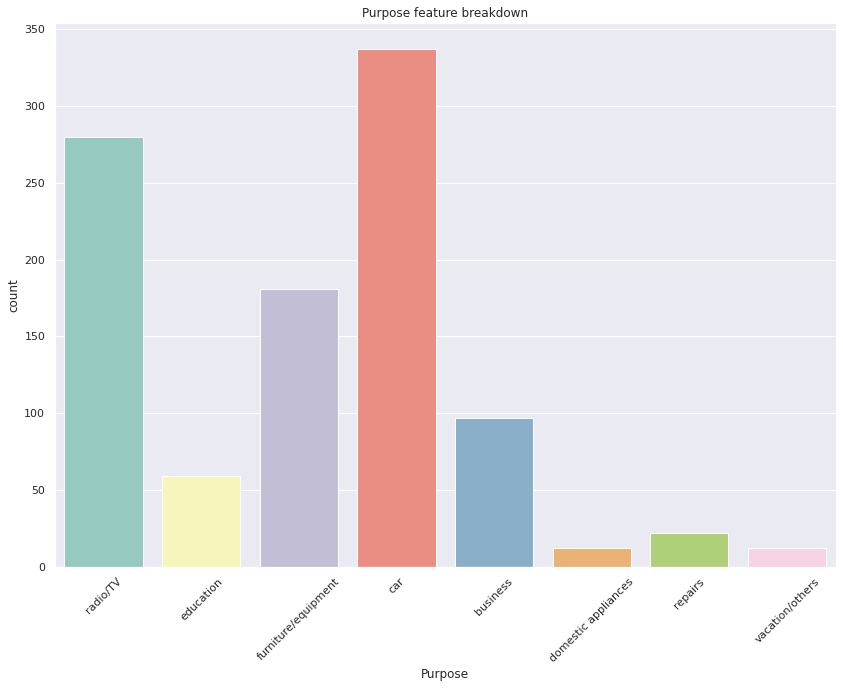

In [ ]:
# plotting bar graph for Purpose feature

fig, ax = plt.subplots(figsize=(14, 10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=df['Purpose'], palette="Set3")
plt.title('Purpose feature breakdown')
plt.xticks(rotation=45);

The histogram chart shows that most of credit purpose is related to car prurchase followed by radio/TV one.

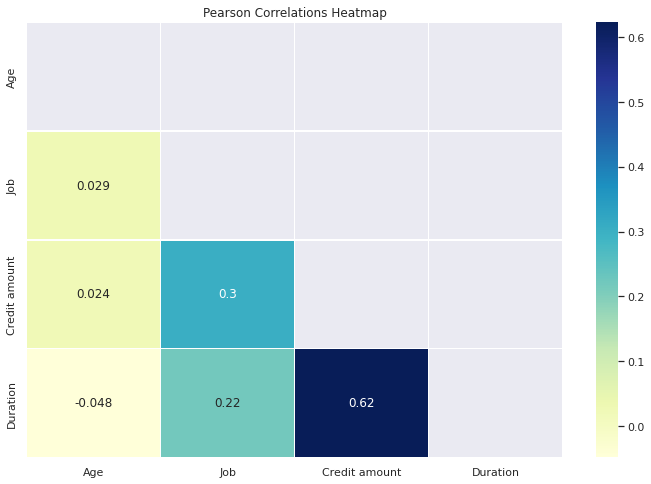

In [ ]:
corr = df[['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']].corr()
sns.set(rc={'figure.figsize':(12, 8)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool_)))\
    .set_title("Pearson Correlations Heatmap");

The Credit amount feature is 'POSITIVELY' correlated to the Duration feature.

In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.524306,1.904000,7.788691,2.877018
std,0.299747,0.653614,0.776474,0.582240
min,2.944439,0.000000,5.521461,1.386294
25%,3.295837,2.000000,7.219276,2.484907
50%,3.496508,2.000000,7.749107,2.890372
75%,3.737670,2.000000,8.287088,3.178054
max,4.317488,3.000000,9.821409,4.276666


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   float64
 1   Sex               1000 non-null   object 
 2   Job               1000 non-null   int64  
 3   Housing           1000 non-null   object 
 4   Saving accounts   1000 non-null   object 
 5   Checking account  1000 non-null   object 
 6   Credit amount     1000 non-null   float64
 7   Duration          1000 non-null   float64
 8   Purpose           1000 non-null   object 
 9   Risk              1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


We have performed log transformation which normalized the data as well as treated the outliers. We have also dealt with the null values. Now we will do one-hot encoding for categorical variables.

In [ ]:
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,4.204693,male,2,own,little,little,7.063904,1.791759,radio/TV,good
1,3.091042,female,2,own,little,moderate,8.691315,3.871201,radio/TV,bad
2,3.891820,male,1,own,little,little,7.647786,2.484907,education,good
3,3.806662,male,2,free,little,little,8.972337,3.737670,furniture/equipment,good
4,3.970292,male,2,free,little,little,8.490849,3.178054,car,bad


In [ ]:
df['Risk'] = df['Risk'].map({'bad':1, 'good':0})

## One-hot encoding:

In [ ]:
df_credit = pd.get_dummies(data=df, columns=['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'])

In [ ]:
df_credit.head(5)

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,4.204693,2,7.063904,1.791759,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,3.091042,2,8.691315,3.871201,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,3.891820,1,7.647786,2.484907,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3.806662,2,8.972337,3.737670,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.970292,2,8.490849,3.178054,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## Standard Scaling

In [ ]:
num_df = df_credit[['Age', 'Duration', 'Credit amount']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_df_scaled = scaler.fit_transform(num_df)

In [ ]:
num_df_scaled

array([[ 2.27100592, -1.86486906, -0.933901  ],
       [-1.44615223,  1.7083687 ,  1.16304581],
       [ 1.22669602, -0.67378981, -0.1815588 ],
       ...,
       [ 0.37810951, -0.67378981, -1.4161991 ],
       [-1.29778048,  1.59746802, -0.34591111],
       [-0.76258638,  1.59746802,  0.82450846]])

## Applying elbow method to find best number of clusters. Plotting the graph. And choosing only the numerical features for clustering.

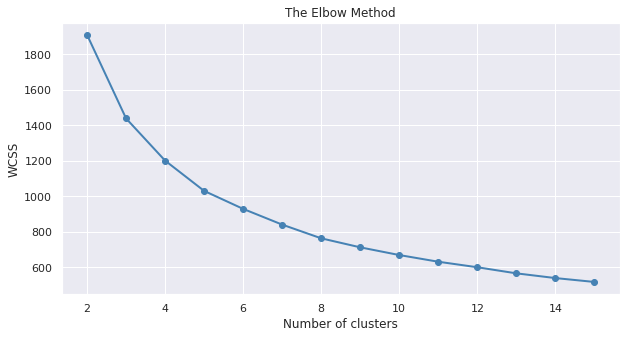

In [ ]:
from sklearn.cluster import KMeans

inertias = []

for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(num_df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(np.arange(2, 16),inertias, marker='o', lw=2, color='steelblue');

## Chose optimum number of clusters=3 and visualizing it using PCA.

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=400, n_init=100, random_state=0)
y_means = kmeans.fit(num_df_scaled)

In [ ]:
from sklearn.decomposition import PCA

pca_2comp = PCA(n_components=2).fit(num_df_scaled)
pca2 = pca_2comp.transform(num_df_scaled)

Variance explained by 2 components

In [ ]:
print("Explained variance = ", pca_2comp.explained_variance_)
print("Explained variance ratio = ", pca_2comp.explained_variance_ratio_)

Explained variance =  [1.62431022 1.00471706]
Explained variance ratio =  [0.5408953  0.33457078]


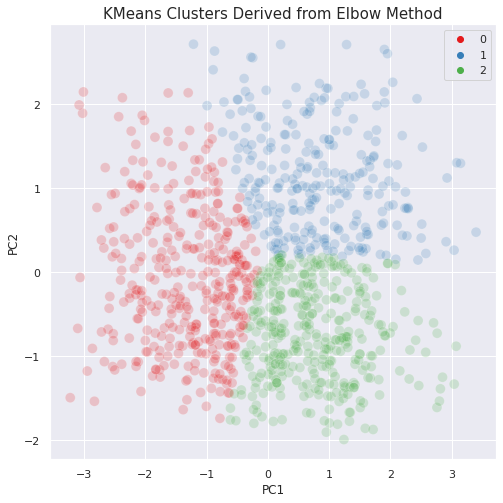

In [ ]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x=pca2[:, 0], y=pca2[:, 1], 
                hue=y_means.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters Derived from Elbow Method', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show();

In [ ]:
km = KMeans(n_clusters=3, random_state=0)
clusters = km.fit_predict(num_df_scaled)

In [ ]:
df_clustered = df_copy[['Age', 'Duration', 'Credit amount']]
df_clustered['cluster'] = clusters

In [ ]:
df_clustered.groupby('cluster').mean()

,Age,Duration,Credit amount
cluster,,,
0,34.042667,32.224000,5665.384000
1,48.593870,13.862069,1970.498084
2,27.739011,14.288462,1737.469780


Analysis:
1. Cluster 1 are the older customers.
2. Cluster 0 are the middle-Aged customers.
3. Cluster 2 are the younger customers.

## Implementing KFOLD CV, using XGBClassifier and reporting the evaluation metrics.

In [ ]:
df_credit=df_credit.drop(['Age', 'Duration', 'Credit amount'], axis=1)
num_df_scaled = pd.DataFrame(num_df_scaled, columns=['Age', 'Duration', 'Credit amount'])
cat_df = df_credit

X = pd.concat([num_df_scaled, cat_df], axis=1)
y = df_credit['Risk']

In [ ]:
X.head(5)

,Age,Duration,Credit amount,Job,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.271006,-1.864869,-0.933901,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.446152,1.708369,1.163046,2,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1.226696,-0.673790,-0.181559,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.942455,1.478913,1.525148,2,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1.488620,0.517289,0.904743,2,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [ ]:
res = cross_val_score(model, X, y, cv=kfold)
prec = cross_val_score(model, X, y, cv=kfold, scoring='precision_weighted')
re = cross_val_score(model, X, y, cv=kfold, scoring='recall_weighted')

In [ ]:
accuracy = round(res.mean()*100, 3)
precision = (round((prec.mean()*100), 3))
recall = (round((re.mean()*100), 3))
f1score = round(2 * ((recall * precision) / (recall + precision)), 3)

In [ ]:
print("Accuracy = ", accuracy)
print("Recall = ", recall)
print("Precision = ", precision)
print("F1score = ", f1score)

Accuracy =  100.0
Recall =  100.0
Precision =  100.0
F1score =  100.0


# Conclusion:

The model performed great. With Accuracy = "100.0", Recall = "100.0", Precision = "100.0" and F1score = "100.0".
## **But it is "overfitting".**